\# Welcome to CS 5242 **Assignment 1**

ASSIGNMENT DEADLINE ⏰ : **23:59 06 Sept 2024**

In this assignment, the task is to implement Multi-Layer Perceptron (MLP) for predicting the price of houses in Boston from scratch.

Colab is a hosted Jupyter notebook service that requires no setup to use, while providing access free of charge to computing resources including GPUs. In this semester, we will use Colab to run our experiments.

> In this assignment, there is no need to use GPU.

### **Grades Policy**

We have 10 points for this assignment. 15% off per day late, 0 scores if you submit it 7 days after the deadline.

### **Cautions**

**DO NOT** use external libraries like PyTorch or TensorFlow in your implementation.

**DO NOT** copy the code from the internet, e.g. GitHub.

---

### **Contact**

Please feel free to contact us if you have any question about this assignment or need any further information.

TA Email: zhangg@u.nus.edu


## Setup

Start by running the cell below to set up all required software.

In [ ]:
# !pip install numpy matplotlib scikit-learn

Import the neccesary library.

In [1]:
import time
import colorama # for colored output
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

Everything is ready, you can move on and ***Good Luck !*** 😃

## Explore Boston Housing Dataset

One of the first steps when working with a new data set is exploring.The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

First, we download the dataset from the Internet.

In [ ]:
# !mkdir -p data \
#     && cd data \
#     && wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data \
#     && ls -l .

# Prefer to store at 1 level up of this notebook

!mkdir -p ../data \
    && cd ../data \
    && wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data \
    && ls -l .

The next thing to do is to reformat the data. Now we reshape the data into a (num_sample, num_features) array.

In [2]:
datafile = '../data/housing.data'
data = np.fromfile(datafile, sep=' ')
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(data.shape)
feature_num = len(feature_names)
data = data.reshape([data.shape[0] // feature_num, feature_num])
print(data.shape)

(7084,)
(506, 14)


One important step of data processing is to rescale the features. In this case, we use minmax scaling. After rescaling, the range of the data will become 0-1.

In [3]:
# rescale data using minmax scaling.
# Alternatively

def scale_data(X):
    X_scaled = None
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    X_scaled = (X - X_min) / (X_max - X_min)
    return X_scaled 


Split the dataset into training and test test

In [4]:
ratio = 0.8
offset = int(data.shape[0] * ratio)

In [5]:
x = data[:, :-1]
y = data[:, -1:]
x = scale_data(x)
X_train = x[:offset]
X_test = x[offset:]
Y_train = y[:offset]
Y_test = y[offset:]

An easy to quickly get an idea for how your data looks is to examine the shape of the matrix it's stored using the `.shape` attribute of numpy arrays. We see that the shape of `X_train` is `404 x 13`, which tells us there are `404` samples (images) each with dimension `13`.

In [6]:
print(f"The shape of the training set is: {X_train.shape[0]} x {X_train.shape[1]}")
print(f"The shape of the test set is: {X_test.shape[0]} x {X_test.shape[1]}")

The shape of the training set is: 404 x 13
The shape of the test set is: 102 x 13


Now lets take a look at how the samples are represented, we can do this by calling `Y_train[index]` and `X_train[index]` (here I choose `index=0` to look at the very first sample). We first notice `Y_train[0]=24`, meaning this entry is a house worthy of 24. The data type of the numpy array is float64 by default.

In [8]:
index = 0
print(f"Y_train[{index}]: {Y_train[index]}\n")
print(X_train[index], "\n")
print(X_train[index].dtype, "\n")

Y_train[0]: [24.]

[0.         0.18       0.06781525 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.20801527 0.28723404 1.
 0.08967991] 

float64 



We can also check how related the features are with the house price.

         CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0    0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4    0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
..        ...   ...       ...   ...       ...       ...       ...       ...   
399  0.111389  0.00  0.646628   0.0  0.633745  0.438973  0.771370  0.033719   
400  0.281441  0.00  0.646628   0.0  0.633745  0.464840  1.000000  0.041757   
401  0.159940  0.00  0.646628   0.0  0.633745  0.533052  1.000000  0.040420   
402  0.107782  0.00  0.646628   0.0  0.633745  0.544740  1.000000  0.046322   
403  0.278694  0.00  0.646628   0.0  0.633745  0.342594  0.958805  0.052124   

          RAD       TAX   PTRATIO         B     LST

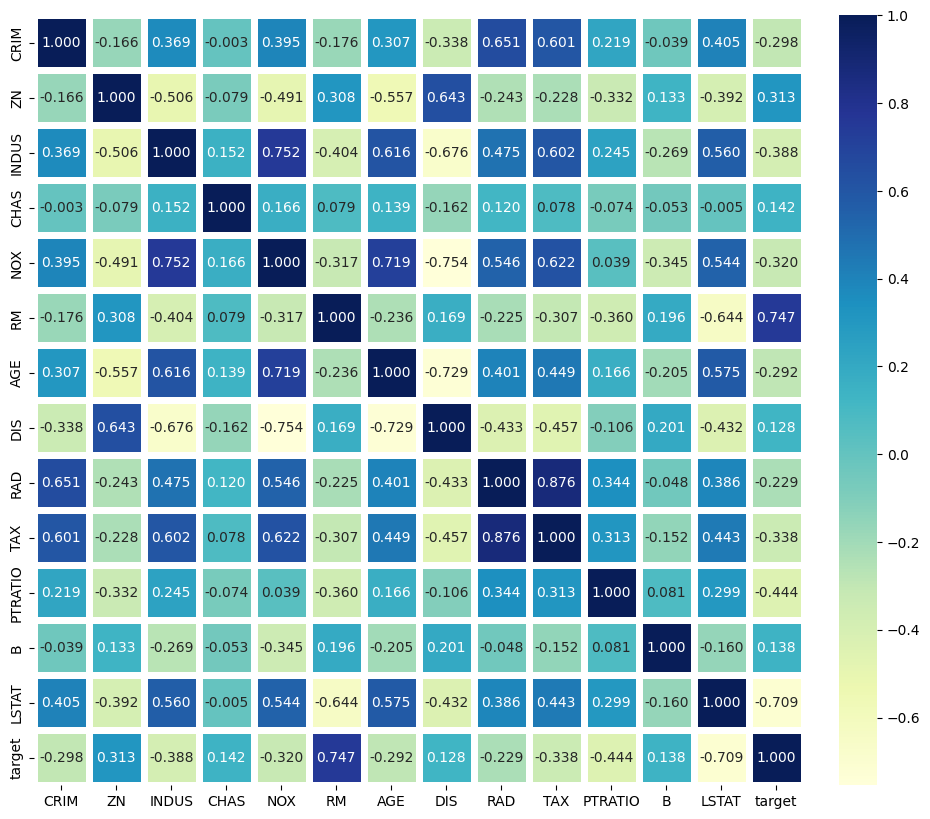

In [9]:
housedatadf=pd.DataFrame(data=X_train,columns=feature_names[:-1])
housedatadf["target"]=Y_train
print(housedatadf)
datacor=np.corrcoef(housedatadf.values,rowvar=0)
datacor=pd.DataFrame(data=datacor,columns=housedatadf.columns,index=housedatadf.columns)
plt.figure(figsize=(15,10))
ax=sns.heatmap(datacor,square=True,annot=True,fmt=".3f",linewidths=5,cmap="YlGnBu",cbar_kws={"fraction":0.046,"pad":0.03})
plt.show()

### Manual feature engineering
From the above heat map, please

(1) find the 3 feature names which are less useful for predicting house price from the original dataset, and give a brief explaination

(2) exclude them from the original `X_train` and `X_test`

In [10]:
#########Enter the 3 feature names here#########  (One point)
least_related_features = datacor["target"].abs().sort_values(ascending=True).head(3).index.tolist()
indices = feature_names.index(least_related_features[0]), feature_names.index(least_related_features[1]), feature_names.index(least_related_features[2])

"""
Explain the reason:
Since we are implementing a 1 layer MLP without any non-linear activation function,
its equivalent to a linear model. Hence the least related features
can be inferred from the correlation matrix. The least related features are the ones
with the least correlation with the target variable.
"""


X_train = np.delete(X_train, indices, axis=1)
X_test = np.delete(X_test, indices, axis=1)

print(f"X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}")

X_train.shape: (404, 10), X_test.shape: (102, 10)


## Implementation of Multilayer perceptron

We'll first go through and write the code for each piece of an MLP in generic Python functions. We'll then wrap everything in an `MLP` class, which will allow us to easily access all the MLP functionality in a user friendly manner.

### Training

You have **three tasks** in this section.
1. You need to implement `__init__` function
1. You need to implement `mse_loss` function
2. You need to implement `forward` function.
3. You need to implement `backward` function.
4. You need to implement the main loop of `train` function.

In [11]:
class MLP(object):
    def __init__(self, num_of_weights: int, learning_rate: float=0.01):
        """Initialize the MLP model with the given number of weights and learning rate.

        Args:
            num_of_weights (int): equivalent to the number of features in the dataset.
            learning_rate (float, optional): scalar multiplier for the gradient. Defaults to 0.01.
        """
        
        # np.random.seed(42)
        # I feel it's better to use the default_rng to avoid the global state of np.random
        
        rng = np.random.default_rng(42)
        self.learning_rate = learning_rate
        self.weight = rng.normal(loc=0.0, scale=0.1, size=(num_of_weights, 1))
        self.bias = np.zeros((1, 1))


    def mse_loss(self, y_pred:np.array, y:np.array) -> float:
        """Using the mean squared error loss function to calculate the loss.

        Args:
            y_pred (np.array): array of predicted values.
            y (np.array): array of true values.

        Returns:
            float: mean squared error loss.
        """
        loss_ = np.mean((y - y_pred) ** 2)
        return loss_

    def forward(self, x):

        #########Enter your code here#########  (One points)
        out_ = np.dot(x, self.weight) + self.bias
        #########Code end#########
        return out_

    def backward(self, x:np.array, y_pred: np.array, y: np.array) -> None:
        """Backward propagation to update the weights and bias.

        Args:
            x (np.array): input feature array.
            y_pred (np.array): predicted values.
            y (np.array): true values.
        """
        grad_ = 2 * (y_pred - y)
        grad_w = np.dot(x.T, grad_)
        grad_b = np.sum(grad_)
        
        # gradient clipping to prevent overflow
        grad_w = np.clip(grad_w, -1, 1)
        grad_b = np.clip(grad_b, -1, 1)
        
        self.weight -= self.learning_rate * grad_w
        self.bias -= self.learning_rate * grad_b
        
        
        # SGD is probably not necessary in this method because the mini batch is already being used in the train method.
        # Nonetheless, it can be implemented as follows:
        
        # for i in range(x.shape[0]):
        #     grad_w = np.dot(x[i].reshape(-1, 1), grad_[i].reshape(1, -1))
        #     grad_b = grad_[i]
            
        #     # Gradient clipping to prevent overflow
        #     grad_w = np.clip(grad_w, -1, 1)
        #     grad_b = np.clip(grad_b, -1, 1)
            
        #     self.weight -= self.learning_rate * grad_w
        #     self.bias -= self.learning_rate * grad_b
        


    def train(self, X, Y, num_epoches, batch_size):
        n_samples = len(X)
        losses = []
        for epoch_id in range(num_epoches):
            shuffle = np.random.permutation(n_samples)
            X_batches = np.array_split(X[shuffle], n_samples / batch_size)
            Y_batches = np.array_split(Y[shuffle], n_samples / batch_size)
            iter_id = 0
            for batch_x, batch_y in zip(X_batches, Y_batches):

                out_ = self.forward(batch_x)
                loss = self.mse_loss(out_, batch_y)
                self.backward(batch_x, out_, batch_y)
                losses.append(loss)


                # print('Epoch {:3d} / iter {:3d}, loss={:4f}'.format(epoch_id + 1, iter_id, loss))
                
                # Made some edits to print the information with colors
                print(f"{colorama.Fore.GREEN}Epoch {epoch_id + 1} - {colorama.Fore.YELLOW}iter {iter_id}, {colorama.Fore.RED}loss={loss:.4f}")
                iter_id += 1
        return losses

Great, now let's give this a try. Let's create a really simple MLP. We'll train with a `batch_size=100` for `epochs=50` and a learning rate `lr=0.5`.

Epoch 1 - iter 0, loss=718.1163
Epoch 1 - iter 1, loss=597.6447
Epoch 1 - iter 2, loss=446.6174
Epoch 1 - iter 3, loss=415.0117
Epoch 2 - iter 0, loss=373.2450
Epoch 2 - iter 1, loss=286.1855
Epoch 2 - iter 2, loss=240.1721
Epoch 2 - iter 3, loss=214.3009
Epoch 3 - iter 0, loss=236.7236
Epoch 3 - iter 1, loss=177.5575
Epoch 3 - iter 2, loss=150.2415
Epoch 3 - iter 3, loss=109.5115
Epoch 4 - iter 0, loss=136.2572
Epoch 4 - iter 1, loss=116.5856
Epoch 4 - iter 2, loss=122.2069
Epoch 4 - iter 3, loss=116.3906
Epoch 5 - iter 0, loss=114.2607
Epoch 5 - iter 1, loss=73.6088
Epoch 5 - iter 2, loss=104.4205
Epoch 5 - iter 3, loss=81.4937
Epoch 6 - iter 0, loss=85.0650
Epoch 6 - iter 1, loss=81.1710
Epoch 6 - iter 2, loss=70.9444
Epoch 6 - iter 3, loss=62.4469
Epoch 7 - iter 0, loss=55.4447
Epoch 7 - iter 1, loss=83.7448
Epoch 7 - iter 2, loss=47.5697
Epoch 7 - iter 3, loss=64.8637
Epoch 8 - iter 0, loss=59.7379
Epoch 8 - iter 1, loss=43.7036
Epoch 8 - iter 2, loss=56.6528
Epoch 8 - iter 3, los

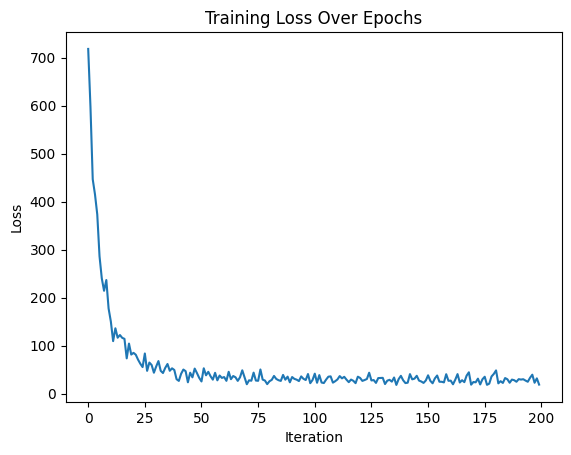

In [13]:
network = MLP(10, 0.5)
losses = network.train(X_train, Y_train, num_epoches=50, batch_size=100)
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.title('Training Loss Over Epochs')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

Now we can check the performance on the test set!

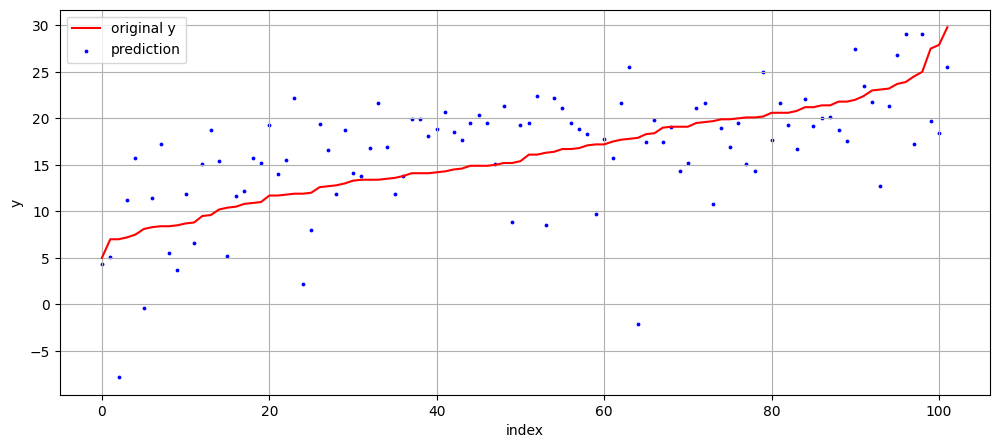

In [14]:
Y_pred=network.forward(X_test)
# mse=mean_absolute_error(y_test,pre_y)
Y_pred = np.squeeze(Y_pred)
Y_test = np.squeeze(Y_test)
index=np.argsort(Y_test)
plt.figure(figsize=(12,5))
plt.plot(np.arange(len(Y_test)),Y_test[index],"r",label="original y")
plt.scatter(np.arange(len(Y_test)),Y_pred[index],s=3,c="b",label="prediction")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("index")
plt.ylabel("y")
plt.show()

## Discussion (1 points)

In this section, you are free to choose some of the following directions to explore, and try to summarize some patterns and conclusions.

* Try to use different learning rates and generalize the impact of learning rate on training.
* Try to use different ways of weight initialization and explore the impact on the convergence and final classification performance.
* Try to use a portion of the data for training (e.g., 10%, 20%, 50%) to explore the training convergence and final classification performance with different amounts of data.

> **NOTE:** *Good Disscusion* include experimental setup, presentation of experimental results including visualization, analysis and interpretation of phenomena, and summary of conclusions

Epoch 1 - iter 0, loss=631.5840
Epoch 1 - iter 1, loss=703.3832
Epoch 1 - iter 2, loss=726.7885
Epoch 1 - iter 3, loss=654.0300
Epoch 2 - iter 0, loss=663.8941
Epoch 2 - iter 1, loss=695.0820
Epoch 2 - iter 2, loss=614.2540
Epoch 2 - iter 3, loss=742.2289
Epoch 3 - iter 0, loss=678.7499
Epoch 3 - iter 1, loss=654.9916
Epoch 3 - iter 2, loss=675.7898
Epoch 3 - iter 3, loss=705.6017
Epoch 4 - iter 0, loss=724.8963
Epoch 4 - iter 1, loss=607.0786
Epoch 4 - iter 2, loss=697.8137
Epoch 4 - iter 3, loss=685.0191
Epoch 5 - iter 0, loss=638.6325
Epoch 5 - iter 1, loss=565.8717
Epoch 5 - iter 2, loss=739.1452
Epoch 5 - iter 3, loss=770.8284
Epoch 6 - iter 0, loss=655.8701
Epoch 6 - iter 1, loss=680.4147
Epoch 6 - iter 2, loss=705.1236
Epoch 6 - iter 3, loss=672.7448
Epoch 7 - iter 0, loss=635.3970
Epoch 7 - iter 1, loss=675.6773
Epoch 7 - iter 2, loss=746.7225
Epoch 7 - iter 3, loss=656.0299
Epoch 8 - iter 0, loss=636.8897
Epoch 8 - iter 1, loss=692.6637
Epoch 8 - iter 2, loss=633.7420
Epoch 8 

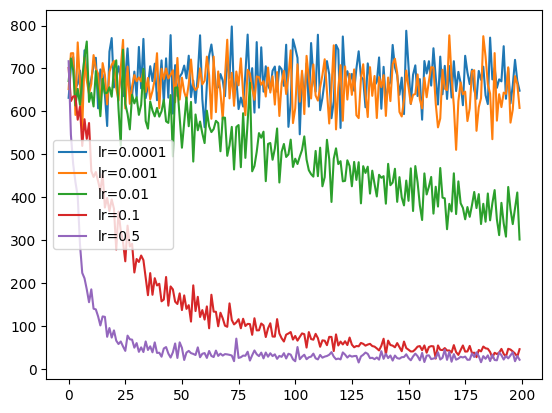

In [16]:
for learning_rate in [0.0001, 0.001, 0.01, 0.1, 0.5]:
    network = MLP(10, learning_rate)
    losses = network.train(X_train, Y_train, num_epoches=50, batch_size=100)
    plot_x = np.arange(len(losses))
    plot_y = np.array(losses)
    plt.plot(plot_x, plot_y, label=f"lr={learning_rate}")


plt.legend()
plt.show()

Remark 1:

We can see that for the learning rate that we have experimented, the bigger ones like 0.1 and 0.5 performed better than the counterparts. The possible reasons could be that with higher multiplier applied to the update of weights and bias, the convergence is quicker. It helped the model to escape the local minma and get closer to the global minima quicker. For small learning rates such as 0.001 and 0.0001, the loss surface is very flat and the model had trouble making progress.

Let's rewrite the class function by making the initialization of weights dynamic so we can explore different ways and compare their effect

In [21]:
class MLP(object):
    def __init__(self, num_of_weights: int, learning_rate: float=0.01, init_method: str='normal'):
        """Initialize the MLP model with the given number of weights and learning rate.

        Args:
            num_of_weights (int): equivalent to the number of features in the dataset.
            learning_rate (float, optional): scalar multiplier for the gradient. Defaults to 0.01.
            init_method (str, optional): initialization method for the weights. Defaults to 'normal'.
        """
        
        # np.random.seed(42)
        # I feel it's better to use the default_rng to avoid the global state of np.random
        
        rng = np.random.default_rng(42)
        self.learning_rate = learning_rate
        if init_method == 'normal':
            self.weight = rng.normal(loc=0.0, scale=0.1, size=(num_of_weights, 1))
        elif init_method == 'uniform':
            self.weight = rng.uniform(low=-0.1, high=0.1, size=(num_of_weights, 1))
        elif init_method == 'xavier':
            limit = np.sqrt(6 / num_of_weights)
            self.weight = rng.uniform(low=-limit, high=limit, size=(num_of_weights, 1))
        elif init_method == 'he':
            self.weight = rng.normal(loc=0.0, scale=np.sqrt(2 / num_of_weights), size=(num_of_weights, 1))
        else:
            raise ValueError(f"Unknown init_method: {init_method}")
        self.bias = np.zeros((1, 1))


    def mse_loss(self, y_pred:np.array, y:np.array) -> float:
        """Using the mean squared error loss function to calculate the loss.

        Args:
            y_pred (np.array): array of predicted values.
            y (np.array): array of true values.

        Returns:
            float: mean squared error loss.
        """
        loss_ = np.mean((y - y_pred) ** 2)
        return loss_

    def forward(self, x):

        #########Enter your code here#########  (One points)
        out_ = np.dot(x, self.weight) + self.bias
        #########Code end#########
        return out_

    def backward(self, x:np.array, y_pred: np.array, y: np.array) -> None:
        """Backward propagation to update the weights and bias.

        Args:
            x (np.array): input feature array.
            y_pred (np.array): predicted values.
            y (np.array): true values.
        """
        grad_ = 2 * (y_pred - y)
        grad_w = np.dot(x.T, grad_)
        grad_b = np.sum(grad_)
        
        # gradient clipping to prevent overflow
        grad_w = np.clip(grad_w, -1, 1)
        grad_b = np.clip(grad_b, -1, 1)
        
        self.weight -= self.learning_rate * grad_w
        self.bias -= self.learning_rate * grad_b
        
        
        # SGD is probably not necessary in this method because the mini batch is already being used in the train method.
        # Nonetheless, it can be implemented as follows:
        
        # for i in range(x.shape[0]):
        #     grad_w = np.dot(x[i].reshape(-1, 1), grad_[i].reshape(1, -1))
        #     grad_b = grad_[i]
            
        #     # Gradient clipping to prevent overflow
        #     grad_w = np.clip(grad_w, -1, 1)
        #     grad_b = np.clip(grad_b, -1, 1)
            
        #     self.weight -= self.learning_rate * grad_w
        #     self.bias -= self.learning_rate * grad_b
        


    def train(self, X, Y, num_epoches, batch_size):
        n_samples = len(X)
        losses = []
        for epoch_id in range(num_epoches):
            shuffle = np.random.permutation(n_samples)
            X_batches = np.array_split(X[shuffle], n_samples / batch_size)
            Y_batches = np.array_split(Y[shuffle], n_samples / batch_size)
            iter_id = 0
            for batch_x, batch_y in zip(X_batches, Y_batches):

                out_ = self.forward(batch_x)
                loss = self.mse_loss(out_, batch_y)
                self.backward(batch_x, out_, batch_y)
                losses.append(loss)


                # print('Epoch {:3d} / iter {:3d}, loss={:4f}'.format(epoch_id + 1, iter_id, loss))
                
                # Made some edits to print the information with colors
                # print(f"{colorama.Fore.GREEN}Epoch {epoch_id + 1} - {colorama.Fore.YELLOW}iter {iter_id}, {colorama.Fore.RED}loss={loss:.4f}")
                iter_id += 1
        return losses

init_method = normal, mse on test set =76.7401
init_method = uniform, mse on test set =70.3123
init_method = xavier, mse on test set =72.4983
init_method = he, mse on test set =69.1840


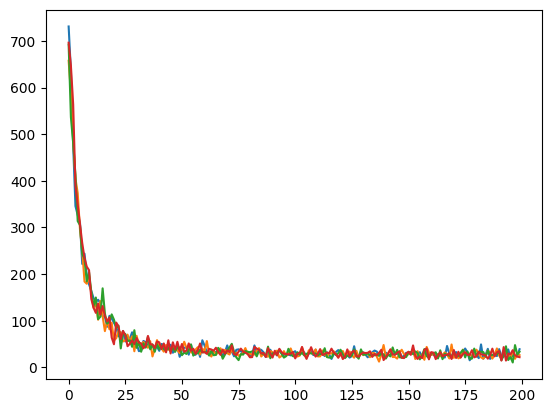

In [24]:
for method in ['normal', 'uniform', 'xavier', 'he']:
    network = MLP(10, 0.5, method)
    losses = network.train(X_train, Y_train, num_epoches=50, batch_size=100)
    preds = network.forward(X_test)
    mse = np.mean((Y_test - preds) ** 2)
    print(f"init_method = {method}, mse on test set ={mse :.4f}")
    plot_x = np.arange(len(losses))
    plot_y = np.array(losses)
    plt.plot(plot_x, plot_y, label=f"init_method={method}")

Remark 2:
If you look at the training losses, there isn't any significant differences among the weight initializers, probably due to the fact that the model is not complex enough to exhibit divergent behavior, the starting point doesn't play a big role in differentiating them.

The differences in the test set performance is explainable. We expect different weight initialization techniques to converge to different regions of the parameter space and thus the generalization capability differ. Xavier and He are known for better generalization and their ability to combating vanishing or exploding gradient 

Let's wrap the splitting and scaling of data in a function so that we can ratio a dynamic input parameter for testing

In [29]:
def split_and_scale_data(data:np.array, ratio: float) -> tuple[np.array, np.array, np.array, np.array]:
    """
    Splits the data into training and test sets based on the given ratio and scales the features.

    Args:
        data (np.ndarray): The input data array where the last column is the target variable.
        ratio (float, optional): The ratio of the data to be used for training.

    Returns:
        tuple: A tuple containing the scaled training and test features and targets (X_train, X_test, Y_train, Y_test).
    """
    offset = int(data.shape[0] * ratio)

    x = data[:, :-1]
    y = data[:, -1:]
    x = scale_data(x)
    X_train = x[:offset]
    X_test = x[offset:]
    Y_train = y[:offset]
    Y_test = y[offset:]
    
    indices = feature_names.index(least_related_features[0]), feature_names.index(least_related_features[1]), feature_names.index(least_related_features[2])
    X_train = np.delete(X_train, indices, axis=1)
    X_test = np.delete(X_test, indices, axis=1)

    return X_train, X_test, Y_train, Y_test

ratio = 0.2, mse on test set =66.8924
ratio = 0.3, mse on test set =104.9885
ratio = 0.4, mse on test set =68.9827
ratio = 0.5, mse on test set =66.8397
ratio = 0.6, mse on test set =73.2751
ratio = 0.7, mse on test set =135.1298
ratio = 0.8, mse on test set =49.0232


/var/folders/h1/rvjbcw3x19dcwnv6qxb4pxrm0000gn/T/ipykernel_38247/1577722020.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


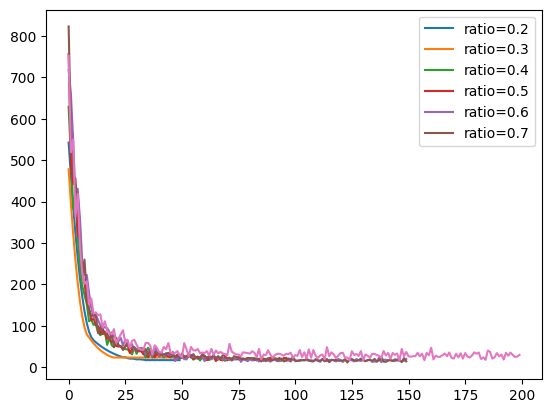

In [31]:
for r in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    X_train, X_test, Y_train, Y_test = split_and_scale_data(data, r)
    network = MLP(10, 0.5, 'normal')
    losses = network.train(X_train, Y_train, num_epoches=50, batch_size=100)
    preds = network.forward(X_test)
    mse = np.mean((Y_test - preds) ** 2)
    print(f"ratio = {r}, mse on test set ={mse :.4f}")
    plot_x = np.arange(len(losses))
    plot_y = np.array(losses)
    plt.legend()
    plt.plot(plot_x, plot_y, label=f"ratio={r}")

Remark 3:

It converges quicker when there are lesser training data points because it is a simpler task and the iteration per epoch will be lesser as well. However, the trade off will be its ability to generalize on unseen data because it is not capturing enough deterministic pattern from the data. It is not a monotonic decreasing trend mainly because of the splitting mechanics. Since we are not doing any shuffling or stratification before splitting, there could be cases where by the training dataset does not help the model to register enough variability or some of the test cases were not representative in the training set.